# DAT257x: Reinforcement Learning Explained

## Lab 2: Bandits

### Exercise 2.4 Thompson Beta

In [1]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 

from lib.envs.bandit import BanditEnv
from lib.simulation import Experiment

In [2]:
#Policy interface
class Policy:
    #num_actions: (int) Number of arms [indexed by 0 ... num_actions-1]
    def __init__(self, num_actions):
        self.num_actions = num_actions
    
    def act(self):
        pass
        
    def feedback(self, action, reward):
        pass

Now let's implement a Thompson Beta algorithm. 



In [3]:
#Tompson Beta policy
class ThompsonBeta(Policy):
    def __init__(self, num_actions):
        Policy.__init__(self, num_actions)
        #PRIOR Hyper-params: successes = 1; failures = 1
        self.total_counts = np.zeros(num_actions, dtype = np.longdouble)
        self.name = "Thompson Beta"
        
        #For each arm, maintain success and failures
        self.successes = np.ones(num_actions, dtype = np.int)
        self.failures = np.ones(num_actions, dtype = np.int)
        
    def act(self):
        """Sample beta distribution from success and failures"""
        
        p = np.random.beta(1 + self.successes, 1 + self.failures)
        
        """Play the max of the sampled values"""
        
        current_action = np.argmax(p)
        return current_action
    
    def feedback(self, action, reward):
        if reward > 0:
            self.successes[action] += 1
        else:
            self.failures[action] += 1
        self.total_counts[action] += 1

Now let's prepare the simulation. 

In [4]:
evaluation_seed = 1239
num_actions = 10
trials = 10000
distribution = "normal"


What do you think the regret graph would look like?

Distribution: normal (array([ 1.67210906,  0.04144904, -2.26004314,  0.55185287, -0.99557374,
       -0.2838564 , -0.50553487, -0.05963477, -0.54748047,  0.61487342]), array([0.16003572, 0.39623439, 0.70679209, 0.13345484, 0.97314585,
       0.28711056, 0.11221114, 0.52693607, 0.53345874, 0.62434873]))
Optimal arm: 0
--------------------------------------------------
Policy: Thompson Beta 
Average Reward: 0.5539040951877393 
Average Regret: 1.1173689000540807
Arm pulls: [3.300e+01 1.000e+00 1.000e+00 9.954e+03 1.000e+00 1.000e+00 1.000e+00
 1.000e+00 1.000e+00 6.000e+00]


<Figure size 720x360 with 0 Axes>

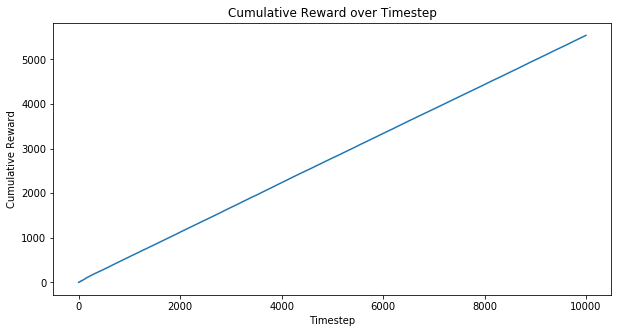

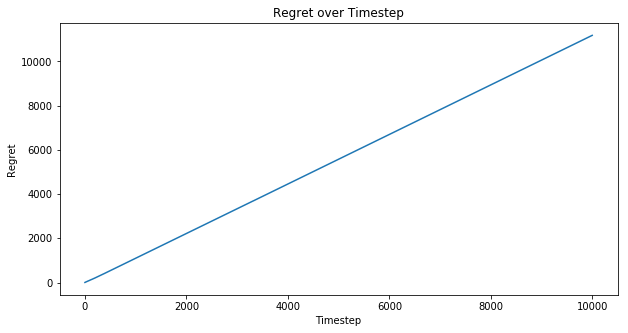

In [5]:
env = BanditEnv(num_actions, distribution, evaluation_seed)
agent = ThompsonBeta(num_actions)
experiment = Experiment(env, agent)
experiment.run_bandit(trials)

Now let's prepare another simulation by setting a different distribution, that is set distribion = "normal"

Run the simulation and observe the results.

What do you think the regret graph would look like?